<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Deep Neural Network Model

Für größere Flexibilität beim Hyperparameter Tuning für neuronale Netze wurde noch eine andere Bibliothek als sklearn verwendet: scikit-neuralnetwork. Dabei handelt es sich um eine Implementierung für Deep Neural Networks basierend auf der mächtigen pylearn2 Bibliothek, die aber für hohe Benutzerfreundlichkeit vollständig kompatibel mit scikit-learn ist. Auf diese Weise konnten weitere Kombinationsmöglichkeiten mit RandomSearchCV ausprobiert werden.

### Initializations

Zunächst musste die zusätzliche Bibliothek über pip installiert werden, ebenso wie kompatible Versionen von Theano und Lasagne. Um die Korrektheit der Installation zu prüfen, wurde außerdem nose installiert und ein Test gestartet.

In [ ]:
# Installation des Scikit Neural Networks 
! pip install scikit-neuralnetwork

In [ ]:
# Upgrade Installation
! pip install --upgrade https://github.com/Lasagne/Lasagne/archive/master.zip

In [ ]:
# Installation Nose
! pip install nose

In [ ]:
! nosetests -v sknn

In [1]:
# benötigte Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
%matplotlib inline

In [2]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
# Laden der Trainings- und Testdaten
X = np.load(file='exchange/hr_06_X.npy')
X_train = np.load(file='exchange/hr_06_X_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_test_scaled.npy')
y = np.load(file='exchange/hr_06_y.npy')
y_train = np.load(file='exchange/hr_06_y_train.npy')
y_test = np.load(file='exchange/hr_06_y_test.npy')

In [4]:
# Definition der Learning Curve-Methode
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Use Deep Neural Network

In einem ersten Schritt wurde ein neuronales Netz mit einem Hidden Layer mit 100 Units aufgebaut. Der Score lag mit 78,15% deutlich hinter den Ergebnissen mit dem neuronalen Netzen von sklearn.

In [9]:
# weitere Bibliotheken importieren
from sknn.mlp import Classifier, Layer

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
# Neural Network mit spezifischen Parametern initialisieren
nn = Classifier(
layers=[
Layer("Sigmoid", units=100),
Layer("Softmax")],
learning_rate=0.001,
n_iter=25)

In [11]:
nn.fit(X_train_scaled, y_train)

Classifier(batch_size=1, callback=None, debug=False, dropout_rate=None,
      f_stable=0.001,
      hidden0=<sknn.nn.Layer `Sigmoid`: name='hidden0', units=100, frozen=False>,
      layers=[<sknn.nn.Layer `Sigmoid`: name='hidden0', units=100, frozen=False>, <sknn.nn.Layer `Softmax`: name='output', units=2, frozen=False>],
      learning_momentum=0.9, learning_rate=0.001, learning_rule='sgd',
      loss_type=None, n_iter=25, n_stable=10, normalize=None,
      output=<sknn.nn.Layer `Softmax`: name='output', units=2, frozen=False>,
      parameters=None, random_state=None, regularize=None, valid_set=None,
      valid_size=0.0, verbose=None, warning=None, weight_decay=None)

In [12]:
# Score berechnen
nn.score(X_test_scaled, y_test)

[(2000, 2)]


0.78149999999999997

In [13]:
# Confusion Matrix und Classification Report erstellen
predictions = nn.predict(X_test_scaled)

[(2000, 2)]


In [14]:
print(confusion_matrix(y_test, predictions))

[[1459   77]
 [ 360  104]]


In [15]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.95      0.87      1536
          1       0.57      0.22      0.32       464

avg / total       0.75      0.78      0.74      2000



/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2668, 2)]
[(533, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2668, 2)]
[(1732, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2668, 2)]
[(2932, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2668, 2)]
[(4132, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2668, 2)]
[(5332, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(533, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(1732, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(2932, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(4132, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(5332, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(533, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(1732, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(2932, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(4132, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(5332, 2)]


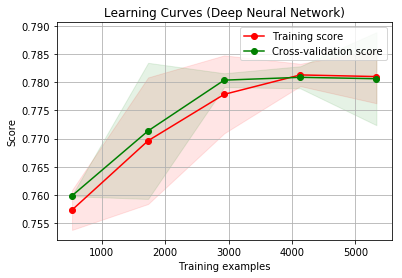

In [16]:
# Learning Curve berechnen
title = 'Learning Curves (Deep Neural Network)'
estimator = nn
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Use Deep Neural Network w/o Department

Auch das Herausnhemen des Department Features brachte keine nennenswerte Verbesserung. Der Score stieg nur minimal auf 78,20%. Aufgrund des Verlaufs der Learning Curve wird von einem Underfitting ausgegangen, welches im nächsten Schritt durch Hyperparameter Tuning überwunden werden sollte. 

In [18]:
# Laden der Trainings- und Testdaten ohne das Feature Department
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')

In [9]:
# weitere Bibliotheken importieren
from sknn.mlp import Classifier, Layer

In [20]:
# Neural Network initialisieren
nn = Classifier(
layers=[
Layer("Sigmoid", units=100),
Layer("Softmax")],
learning_rate=0.001,
n_iter=25)

In [21]:
nn.fit(X_train_scaled, y_train)

Classifier(batch_size=1, callback=None, debug=False, dropout_rate=None,
      f_stable=0.001,
      hidden0=<sknn.nn.Layer `Sigmoid`: name='hidden0', units=100, frozen=False>,
      layers=[<sknn.nn.Layer `Sigmoid`: name='hidden0', units=100, frozen=False>, <sknn.nn.Layer `Softmax`: name='output', units=2, frozen=False>],
      learning_momentum=0.9, learning_rate=0.001, learning_rule='sgd',
      loss_type=None, n_iter=25, n_stable=10, normalize=None,
      output=<sknn.nn.Layer `Softmax`: name='output', units=2, frozen=False>,
      parameters=None, random_state=None, regularize=None, valid_set=None,
      valid_size=0.0, verbose=None, warning=None, weight_decay=None)

In [22]:
# Score berechnen
nn.score(X_test_scaled, y_test)

[(2000, 2)]


0.78200000000000003

In [23]:
# Confusion Matrix und Classification Report erstellen
predictions = nn.predict(X_test_scaled)

[(2000, 2)]


In [24]:
print(confusion_matrix(y_test, predictions))

[[1455   81]
 [ 355  109]]


In [25]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.95      0.87      1536
          1       0.57      0.23      0.33       464

avg / total       0.75      0.78      0.75      2000



/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2668, 2)]
[(533, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2668, 2)]
[(1732, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2668, 2)]
[(2932, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2668, 2)]
[(4132, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2668, 2)]
[(5332, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(533, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(1732, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(2932, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(4132, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(5332, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(533, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(1732, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(2932, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(4132, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(5332, 2)]


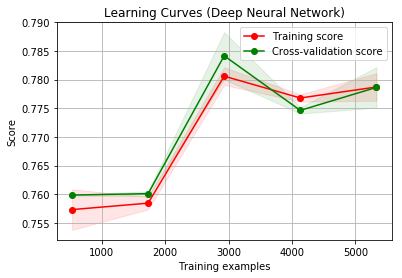

In [26]:
# Learning Curve berechnen
title = 'Learning Curves (Deep Neural Network)'
estimator = nn
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Hyperparameter Tuning Using Randomized Search

Bei der scikit-neuralnetwork Bibliothek ist es möglich durch RandomizedSearch für jeden Layer einzelnen die optimale Anzahl an Neuronen und die Aktivierungsfunktion zu bestimmen. Deshalb wurde für eine weitere Verbesserung des Scores ein neuronales Netz mit bis zu drei Hidden Layern vorgegeben. Learning Rate und Dropout Rate wurden wurden ebenfalls dynamisch bestimmt. Mit den so bestimmten Hyperparametern konnte der Score auf 93,60% erhöht werden. Er liegt damit immer noch hinter der Leistung des normalen neuronalen Netzes zurück. Mit mehr Rechenleistung beispielsweise durch Ausführung auf einer GPU wäre es allerdings möglich, weitere Durchläufe bei RandomizedSearchCV zu erzielen und somit noch besssere Hyperparameter zu finden. Mit den gegebenen Ressourcen and Rechnenleistung und Menge an Trainingsdaten ist es allerdings wahrscheinlich, dass es noch besser geeignete Machine Learning Modelle als neuronale Netze gibt.

In [5]:
# weitere Bibliotheken importieren
from scipy import stats
from sklearn.grid_search import RandomizedSearchCV
from sknn.mlp import Classifier, Layer

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [6]:
# Warnungen ausblenden
import warnings; warnings.simplefilter('ignore')

In [7]:
# weitere Funktionen importieren
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [8]:
# Laden der Trainings- und Testdaten ohne das Feature Department
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')

In [10]:
# Neural Network initialisieren
nn = Classifier(
layers=[
Layer(type='Sigmoid'),
Layer(type='Sigmoid'),
Layer(type='Sigmoid'),
Layer("Softmax")],
n_iter=100)

In [11]:
# zu testende Parameter vorgeben
rs = RandomizedSearchCV(nn, param_distributions={
    'learning_rule':['adagrad', 'sgd', 'rmsprop', 'nesterov', 'momentum', 'adadelta'],
    'learning_rate': stats.uniform(0.01, 0.1),
    'dropout_rate': stats.uniform(0.0, 0.5),
    'hidden0__units': stats.randint(0, 200),
    'hidden0__type': ["Rectifier", "Sigmoid", "Tanh"],
    'hidden1__units': stats.randint(0, 200),
    'hidden1__type': ["Rectifier", "Sigmoid", "Tanh"],
    'hidden2__units': stats.randint(0, 200),
    'hidden2__type': ["Rectifier", "Sigmoid", "Tanh"]}, 
                       n_iter=50, n_jobs=-1, cv=3)

In [ ]:
# Modelle erstellen
rs.fit(X_train_scaled, y_train)

In [ ]:
# Histogramm erstellen
scores = pd.DataFrame(rs.grid_scores_)
plt.hist(scores['mean_validation_score'], bins=10)
plt.title('Histogram of Mean Score Distribution');

In [ ]:
# besten Modellscore ausgeben
rs.best_score_

In [21]:
# beste Parameterkombination ausgeben
rs.best_params_

{'dropout_rate': 0.16479772066588541,
 'hidden0__type': 'Tanh',
 'hidden0__units': 15,
 'hidden1__type': 'Rectifier',
 'hidden1__units': 68,
 'hidden2__type': 'Sigmoid',
 'hidden2__units': 48,
 'learning_rate': 0.057130222946153164,
 'learning_rule': 'adagrad'}

In [15]:
# Neural Network mit bester Parameterkombination initialisieren
nn = Classifier(
layers=[
Layer("Tanh", units=15),
Layer("Rectifier", units=68),
Layer("Sigmoid", units=48),
Layer("Softmax")],
learning_rate=0.037264369083717247,
dropout_rate=0.16479772066588541,
learning_rule='adagrad')

In [16]:
nn.fit(X_train_scaled, y_train)

Classifier(batch_size=1, callback=None, debug=False,
      dropout_rate=0.1647977206658854, f_stable=0.001,
      hidden0=<sknn.nn.Layer `Tanh`: name='hidden0', units=15, frozen=False>,
      hidden1=<sknn.nn.Layer `Rectifier`: name='hidden1', units=68, frozen=False>,
      hidden2=<sknn.nn.Layer `Sigmoid`: name='hidden2', units=48, frozen=False>,
      layers=[<sknn.nn.Layer `Tanh`: name='hidden0', units=15, frozen=False>, <sknn.nn.Layer `Rectifier`: name='hidden1', units=68, frozen=False>, <sknn.nn.Layer `Sigmoid`: name='hidden2', units=48, frozen=False>, <sknn.nn.Layer `Softmax`: name='output', units=2, frozen=False>],
      learning_momentum=0.9, learning_rate=0.03726436908371725,
      learning_rule='adagrad', loss_type=None, n_iter=None, n_stable=10,
      normalize=None,
      output=<sknn.nn.Layer `Softmax`: name='output', units=2, frozen=False>,
      parameters=None, random_state=None, regularize='dropout',
      valid_set=None, valid_size=0.0, verbose=None, warning=None,
   

In [17]:
# Score ausgeben
nn.score(X_test_scaled, y_test)

[(2000, 2)]


0.90300000000000002

In [18]:
# Confusion Matrix erstellen
predictions = nn.predict(X_test_scaled)

[(2000, 2)]


In [19]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1497   39]
 [ 155  309]]


In [20]:
# Laden der Dictionary-Datei
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1494,   42],
       [  29,  435]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1520,   16],
       [  24,  440]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1522,   14],
       [  24,  440]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1471,   65],
       [ 108,  356]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1504,   32],
       [  26,  438]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [21]:
# Aktualisieren der Werte der Confusion Matrix und exportieren der Ergebnisse
cm_dict.item().update({'deep_neural_net':{'cm': cm, 'label': 'Deep Neural Network' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1494,   42],
       [  29,  435]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1520,   16],
       [  24,  440]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1522,   14],
       [  24,  440]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1471,   65],
       [ 108,  356]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1497,   39],
       [ 155,  309]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1504,   32],
       [  26,  438]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [22]:
# Classification Report erstellen
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1536
          1       0.89      0.67      0.76       464

avg / total       0.90      0.90      0.90      2000



[(2668, 2)]
[(533, 2)]
[(2668, 2)]
[(1732, 2)]
[(2668, 2)]
[(2932, 2)]
[(2668, 2)]
[(4132, 2)]
[(2668, 2)]
[(5332, 2)]
[(2666, 2)]
[(533, 2)]
[(2666, 2)]
[(1732, 2)]
[(2666, 2)]
[(2932, 2)]
[(2666, 2)]
[(4132, 2)]
[(2666, 2)]
[(5332, 2)]
[(2666, 2)]
[(533, 2)]
[(2666, 2)]
[(1732, 2)]
[(2666, 2)]
[(2932, 2)]
[(2666, 2)]
[(4132, 2)]
[(2666, 2)]
[(5332, 2)]


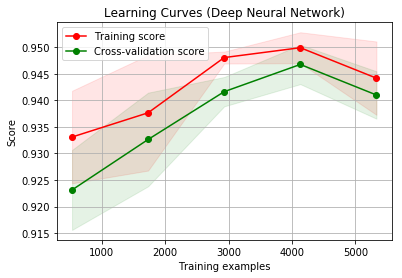

In [23]:
title = 'Learning Curves (Deep Neural Network)'
estimator = nn
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()